In [1]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(igraph)
library(gapmap)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformati

In [2]:
dfv5 <- read_tsv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region5.tsv')
dfv3 <- read_tsv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region3.tsv')

#dft <- read_tsv('../Data/MatrixPathwaysTop15_time.tsv')


#rownames_dft <- dft$'function'
rownames_dfv5 <- dfv5$'function'
rownames_dfv3 <- dfv3$'function'

#mat_t <- as.matrix(dft) 
mat_v5 <- as.matrix(dfv5)
mat_v3 <- as.matrix(dfv3)

#mat_t <- mat_t[, -1]
mat_v5 <- mat_v5[, -1]
mat_v3 <- mat_v3[, -1]

#colnames_dft = colnames(mat_t)
colnames_dfv5 = colnames(mat_v5)
colnames_dfv3 = colnames(mat_v3)


mat_v5 <- matrix(as.numeric(mat_v5), nrow=nrow(mat_v5), ncol=ncol(mat_v5))
mat_v3 <- matrix(as.numeric(mat_v3), nrow=nrow(mat_v3), ncol=ncol(mat_v3))
#mat_t <- matrix(as.numeric(mat_t), nrow=nrow(mat_t), ncol=ncol(mat_t))


rownames(mat_v5) <- rownames_dfv5
rownames(mat_v3) <- rownames_dfv3

#rownames(mat_t) <- rownames_dft

colnames(mat_v5) <- colnames_dfv5
colnames(mat_v3) <- colnames_dfv3

#rownames(mat_v) <- rownames_dfv
#colnames(mat_t) <- colnames_dft

head(mat_v5)

Rows: 51 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): function
dbl (38): 19A, 19B, 20A, 20B, 20C, 20D, 20E, 20F, 20G, 20H, 20I, 20J, 21A, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 77 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): function
dbl (38): 19A, 19B, 20A, 20B, 20C, 20D, 20E, 20F, 20G, 20H, 20I, 20J, 21A, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,19A,19B,20A,20B,20C,20D,20E,20F,20G,20H,⋯,22D,22E,22F,23A,23B,23C,23D,23E,23F,recombinant
Desarrollo de sistema,NA,NA,NA,21,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Desarrollo de tubo,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,20,20,NA,NA,NA,NA,13,NA,10
Fosforilación,NA,NA,10,25,NA,28,15,11,11,15,⋯,NA,22,21,NA,14,25,NA,NA,15,10
Fosforilación de proteinas,19,19,19,48,18,51,30,22,22,28,⋯,31,40,37,27,29,47,17,23,28,20
Metabolismo de nitrógeno,9,NA,NA,23,NA,31,17,11,NA,17,⋯,21,24,22,16,14,27,NA,13,13,NA
Morfogénesis,NA,10,NA,NA,10,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,9,NA,NA,NA


Warning message:
“The `panel.margin` argument of `theme()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `panel.spacing` argument instead.
ℹ The deprecated feature was likely used in the gapmap package.
  Please report the issue at
  <https://github.com/evanbiederstedt/gapmap/issues>.”


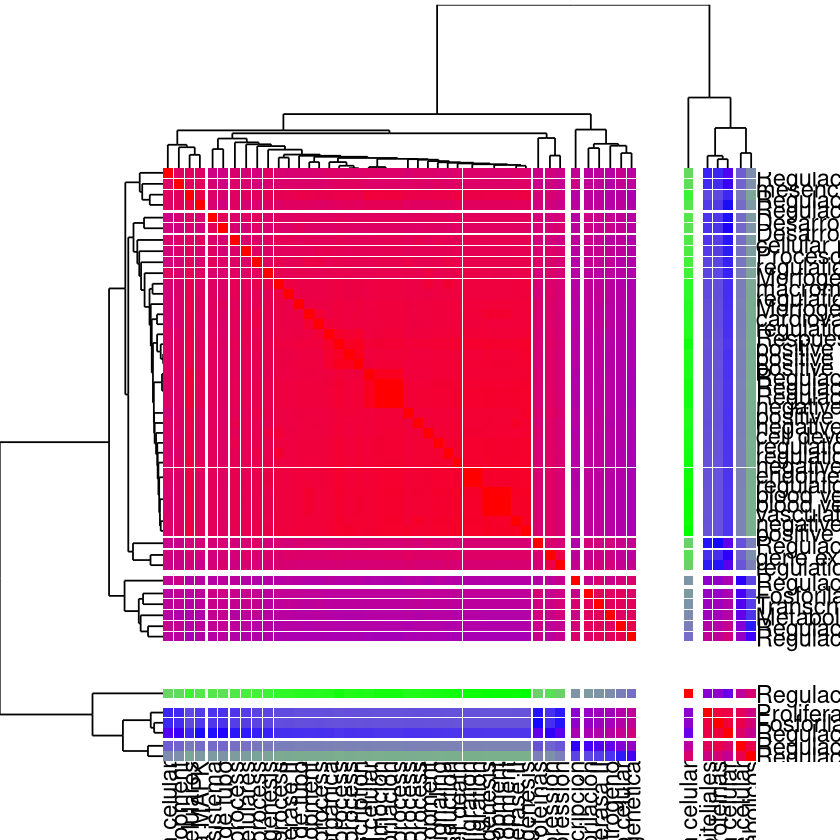

In [3]:

mat_v5[is.na(mat_v5)] <- 0
data <- mat_v5
dist_data <- dist(data, method = "euclidean", diag = TRUE, upper = TRUE)
hc <- hclust(dist_data, method = "complete")
dend <- as.dendrogram(hc)

grey_scale <- c("red", "blue", 'green')
gapmap(m = as.matrix(dist_data), d_row = rev(dend), d_col = dend, col = grey_scale)




In [4]:
mat_v5[is.na(mat_v5)] <- 0
#mat_t[mat_t == 0] <- NA

promedios <- apply(mat_v5, 1, mean) 
indices <- order(promedios, decreasing = TRUE)[1:15]
m5 <- mat_v5[indices, ]


options(repr.plot.width = 13, repr.plot.height = 7)
pdf("../../Plots/HeatmapVariants5.pdf", width = 13, height = 7)
htv <- Heatmap(m5, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 40, 2, 2), "mm"))
dev.off()

png 
  2

In [5]:
mat_v3[is.na(mat_v3)] <- 0
#mat_t[mat_t == 0] <- NA

promedios <- apply(mat_v3, 1, mean) 
indices <- order(promedios, decreasing = TRUE)[1:15]
m3 <- mat_v3[indices, ]

options(repr.plot.width = 13, repr.plot.height = 7)
pdf("../../Plots/HeatmapVariants3.pdf", width = 13, height = 7)
htv <- Heatmap(m3, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 30, 2, 2), "mm"))
dev.off()

png 
  2

In [6]:
dfv5 <- read_tsv('../../Data/MatrixOutliersVariants_5.tsv')
dfv3 <- read_tsv('../../Data/MatrixOutliersVariants_3.tsv')



rownames_dfv5 <- dfv5$...1
rownames_dfv3 <- dfv3$...1

#mat_t <- as.matrix(dft) 
mat_v5 <- as.matrix(dfv5)
mat_v3 <- as.matrix(dfv3)

#mat_t <- mat_t[, -1]
mat_v5 <- mat_v5[, -1]
mat_v3 <- mat_v3[, -1]

#colnames_dft = colnames(mat_t)
colnames_dfv5 = colnames(mat_v5)
colnames_dfv3 = colnames(mat_v3)


mat_v5 <- matrix(as.numeric(mat_v5), nrow=nrow(mat_v5), ncol=ncol(mat_v5))
mat_v3 <- matrix(as.numeric(mat_v3), nrow=nrow(mat_v3), ncol=ncol(mat_v3))
#mat_t <- matrix(as.numeric(mat_t), nrow=nrow(mat_t), ncol=ncol(mat_t))


rownames(mat_v5) <- rownames_dfv5
rownames(mat_v3) <- rownames_dfv3

#rownames(mat_t) <- rownames_dft

colnames(mat_v5) <- colnames_dfv5
colnames(mat_v3) <- colnames_dfv3

#rownames(mat_v) <- rownames_dfv
#colnames(mat_t) <- colnames_dft

head(mat_v5)

New names:
• `` -> `...1`
Rows: 48 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ...1
dbl (8): 20B, 20D, 21H, 21I, 22B, 22E, 22F, 23C

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 47 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (22): 20A, 20B, 20C, 20D, 20E, 20G, 21C, 21D, 21E, 21F, 21H, 21I, 21J, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,20B,20D,21H,21I,22B,22E,22F,23C
Desarrollo de organismos multicelulares,NA,21,21,23,NA,NA,NA,NA
Desarrollo de sistema,21,24,23,27,NA,NA,NA,NA
Desarrollo de tubo,NA,24,24,27,NA,NA,NA,NA
Desarrollo glandular,NA,22,NA,24,NA,NA,NA,NA
Fosforilación,25,28,25,29,NA,NA,NA,25
Fosforilación de proteinas,NA,73,NA,74,NA,NA,NA,NA


In [7]:
mat_v5[is.na(mat_v5)] <- 0
mat_v3[is.na(mat_v3)] <- 0

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)
pdf("../../Plots/HeatmapVariants5_outliers.pdf", width = 12, height = 8)
htv <- Heatmap(mat_v5, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 50, 2, 2), "mm"))
dev.off()

png 
  2

In [9]:

options(repr.plot.width = 15, repr.plot.height = 8)
pdf("../../Plots/HeatmapVariants3_outliers.pdf", width = 15, height = 8)
htv <- Heatmap(mat_v3, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 95, 2, 2), "mm"))
dev.off()

png 
  2

# Plot outliers

In [10]:
dfv5 <- read_tsv('../../Data/MatrixOutliersVariants_5_kegg.tsv')
dfv3 <- read_tsv('../../Data/MatrixOutliersVariants_3_kegg.tsv')

rownames_dfv5 <- dfv5$...1
rownames_dfv3 <- dfv3$...1

#mat_t <- as.matrix(dft) 
mat_v5 <- as.matrix(dfv5)
mat_v3 <- as.matrix(dfv3)

#mat_t <- mat_t[, -1]
mat_v5 <- mat_v5[, -1]
mat_v3 <- mat_v3[, -1]

#colnames_dft = colnames(mat_t)
colnames_dfv5 = colnames(mat_v5)
colnames_dfv3 = colnames(mat_v3)


mat_v5 <- matrix(as.numeric(mat_v5), nrow=nrow(mat_v5), ncol=ncol(mat_v5))
mat_v3 <- matrix(as.numeric(mat_v3), nrow=nrow(mat_v3), ncol=ncol(mat_v3))
#mat_t <- matrix(as.numeric(mat_t), nrow=nrow(mat_t), ncol=ncol(mat_t))


rownames(mat_v5) <- rownames_dfv5
rownames(mat_v3) <- rownames_dfv3

#rownames(mat_t) <- rownames_dft

colnames(mat_v5) <- colnames_dfv5
colnames(mat_v3) <- colnames_dfv3

#rownames(mat_v) <- rownames_dfv
#colnames(mat_t) <- colnames_dft

head(mat_v5)

New names:
• `` -> `...1`
• `20E` -> `20E...4`
• `20E` -> `20E...5`
• `21I` -> `21I...13`
• `21I` -> `21I...14`
Rows: 6 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (21): 20B, 20D, 20E...4, 20E...5, 20G, 20H, 20I, 21E, 21F, 21G, 21H, 21I...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (18): 19A, 20E, 20F, 20G, 21C, 21E, 21G, 21I, 21K, 21M, 22B, 22D, 22F, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,20B,20D,20E...4,20E...5,20G,20H,20I,21E,21F,21G,⋯,21I...13,21I...14,21J,22A,22D,22E,23A,23C,23F,recombinant
HIF-1 signaling pathway,2,2,NA,2,NA,2,2,NA,2,NA,⋯,NA,2,NA,2,2,NA,2,NA,NA,2
Jak-STAT signaling pathway,NA,NA,NA,NA,NA,NA,2,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Neurotrophin signaling pathway,2,2,NA,NA,NA,NA,NA,2,2,2,⋯,NA,2,2,NA,NA,2,NA,2,NA,NA
Rap1 signaling pathway,3,NA,NA,NA,NA,NA,NA,3,NA,NA,⋯,NA,3,NA,NA,NA,NA,NA,NA,3,NA
Wnt signaling pathway,2,NA,2,NA,2,NA,NA,NA,NA,NA,⋯,2,NA,NA,NA,NA,NA,NA,NA,NA,NA
mTOR signaling pathway,3,NA,NA,NA,NA,NA,NA,3,NA,NA,⋯,NA,3,NA,NA,NA,NA,NA,NA,3,NA


In [11]:
mat_v5[is.na(mat_v5)] <- 0
mat_v3[is.na(mat_v3)] <- 0

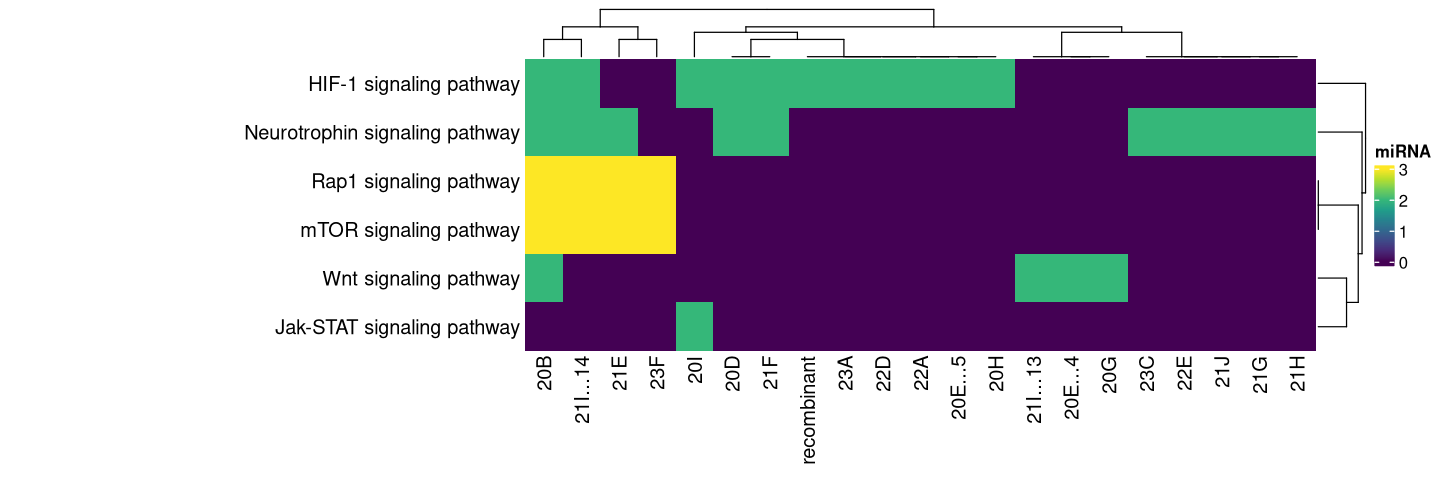

In [26]:
options(repr.plot.width = 12, repr.plot.height = 4)
#pdf("../../Plots/HeatmapVariants5_outliers_kegg.pdf", width = 12, height = 4)
htv <- Heatmap(mat_v5, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 50, 2, 2), "mm"))
#dev.off()

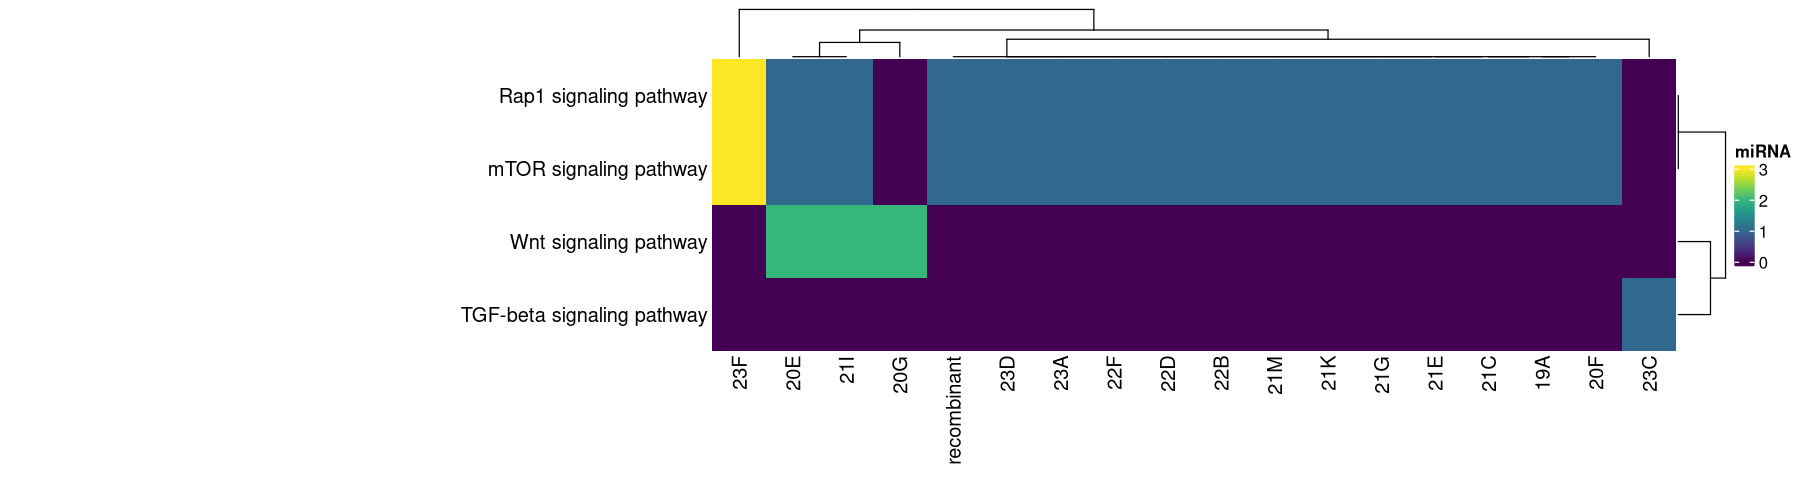

In [25]:

options(repr.plot.width = 15, repr.plot.height = 4)
#pdf("../../Plots/HeatmapVariants3_outliers_kegg.pdf", width = 15, height = 4)
htv <- Heatmap(mat_v3, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 95, 2, 2), "mm"))
#dev.off()